In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

class gaussian():
    def __init__(self, mu, sigma, name=''):
        self.mu = mu
        self.sigma = sigma
        self.name = name + r"$\mu={}, \sigma={}$".format(mu, sigma)
    def __call__(self, x):
        return np.exp(-(x-self.mu)**2/(2*self.sigma**2))/np.sqrt(2*np.pi*self.sigma**2)

def KL_gauss(p, q):
    r = p.sigma**2/q.sigma**2
    return (-np.log(r) + (r-1) + (p.mu-q.mu)**2/q.sigma**2)/2

def plot_for(q, color):
    ax1.plot(x, q(x), alpha=0.9, color=color, label=q.name)
    ax2.scatter(q.sigma, KL_gauss(p, q), alpha=0.9, color=color, label=q.name)
    return None

def get_objects():    
    fig = plt.figure(figsize=(13,4))
    ax1 = fig.add_subplot(121); ax1.set_xlabel("x"); ax1.set_title("probability")
    ax2 = fig.add_subplot(122); ax2.set_xlabel(r"$\sigma$"); ax2.set_title(r"$D_{KL}(p||q)$")
    x = np.linspace(-4,6,100)
    cmap = cm.coolwarm
    return fig, ax1, ax2, x, cmap 

## 2-2. KL情報量
KL情報量

$$
D_{KL}(p \| q) = \int p({\bf x}) \log \frac{p({\bf x})}{q({\bf x})} d {\bf x}
$$

は重要な量なので、もう少しその性質を詳しく掘り下げてみましょう。

### KL情報量の持つ性質
どんな確率分布 $p, q$ についても"**距離**"の性質

$$
1.\ D_{KL}(p\|q) \geq 0, \quad 2.\ D_{KL}(p\|q)=0 \Leftrightarrow \forall {\bf x}, p({\bf x}) = q({\bf x})
$$

が成り立ちます。
> 数学的な距離の公理はこの二つの性質に加え、対称性 $3. D(p\|q) = D(q\|p)$ を要求しますが、これは満たされません。

少々厳密性に欠けますが、シンプルな証明をしてみましょう。まず

$$
\int p({\bf x}) d{\bf x} = \int q({\bf x}) d{\bf x} = 1
$$

であることと、$X \geq 0$に対し$X - 1 \geq \log X$であること(後で確認)を使うと

$$
\left. \begin{array}{ll}
D_{KL}(p\|q) &= \int p({\bf x}) \log \frac{p({\bf x})}{q({\bf x})} dx
\\
&=\int \Big( p({\bf x}) \log \frac{p({\bf x})}{q({\bf x})} + q({\bf x})- p({\bf x})\Big) d{\bf x}
\\
&=\int p({\bf x}) \Big( \log \frac{p({\bf x})}{q({\bf x})} + \frac{q({\bf x})}{p({\bf x})}- 1\Big) d{\bf x}
\\
&=\int p({\bf x}) \underbrace{\Big( - \log \frac{q({\bf x})}{p({\bf x})} + \frac{q({\bf x})}{p({\bf x})}- 1\Big) }_{- \log X + X - 1\geq 0}d{\bf x}
\end{array} \right.
$$

となります。これは0以上の値を積分しているので明らかに$D_{KL} \geq 0$であり、値が0になるためには全ての ${\bf x}$ で $X = \frac{q({\bf x})}{p({\bf x})} = 1$ でなくてはなりません。$_\blacksquare$

証明の肝の $- \log X + X - 1
\geq 0$ ですが、$y = \log(x)$ と $y=x-1$ のグラフを描けば一目瞭然です：

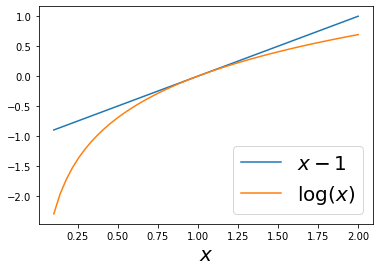

In [3]:
x = np.linspace(0.1,2, 50); plt.xlabel(r"$x$", fontsize=20)
plt.plot(x, x-1, label=r'$x-1$')
plt.plot(x, np.log(x), label=r'$\log(x)$')
plt.legend(fontsize=20); plt.show()

### ガウス分布のKL情報量
練習問題として

$$
p(x) = \frac{1}{\sqrt{2 \pi}} e^{- \frac{1}{2} x^2},\quad q_{\mu, \sigma}(x)= \frac{1}{\sqrt{2 \pi \sigma^2}} e^{ - \frac{1}{2 \sigma^2} (x- \mu)^2}
$$

として計算してみましょう。

$$
\left. \begin{array}{ll}
D_{KL}(p\|q_{\mu, \sigma})&=\int p(x)\log \frac{p(x)}{q_{\mu, \sigma}(x)} dx =
\Big\langle \log \frac{p(x)}{q_{\mu, \sigma}(x)} \Big\rangle_p = \Big\langle \log \sqrt{\sigma^2} e^{ -\frac{1}{2} x^2 + \frac{1}{2 \sigma^2} (x - \mu)^2 }  \Big\rangle_p
\\
&= \Big\langle\frac{1}{2} \log \sigma^2 - \frac{1}{2}x^2 + \frac{1}{2 \sigma^2} (x-\mu)^2 \Big\rangle_p
\\
&= \frac{1}{2} \Big( \log \sigma^2 \langle 1 \rangle_p - \langle x^2 \rangle_p + \frac{1}{\sigma^2} \underbrace{\langle (x - \mu)^2 \rangle_p}_{\langle x^2\rangle_p - 2 \langle x \rangle_p \mu + \mu^2 \langle 1 \rangle_p}\Big)
\\
&= \frac{1}{2} \Big(\log \sigma^2 - 1 + \frac{1}{\sigma^2} (1 + \mu^2 )\Big)
\end{array} \right.
$$

入れ替えてやってみると

$$
D_{KL}(q_{\mu, \sigma}\|p) = \frac{1}{2}\Big(-\log \sigma^2 - 1 + \sigma^2 + \mu^2 \Big)
$$

となることが示せます。より一般には以下のようになります：

---
## レポート問題1
以下を示してください

$$
D_{KL}(q_{\mu_1, \sigma_1}\| q_{\mu_2, \sigma_2}) = \frac{1}{2} \Big(- \log \frac{\sigma_1^2}{\sigma_2^2}+(\frac{\sigma_1^2}{\sigma_2^2} -1 )+\frac{1}{\sigma^2_2} (\mu_1 - \mu_2)^2\Big)
$$

---

となります。これが$(\mu_1, \sigma_1) = (\mu_2, \sigma_2)$のときのみ0になることは$X-1 \geq \log X$などを使えば示せますが、視覚的に確かめることもできます：



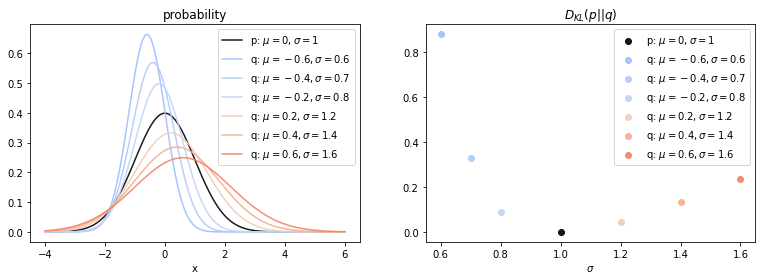

In [7]:
fig, ax1, ax2, x, cmap = get_objects()
p = gaussian(0, 1, name='p: '); plot_for(p, 'black') # plot p
for mu, sigma in [(-.6, 0.6), (-.4, 0.7), (-.2, 0.8), (.2, 1.2), (.4, 1.4), (.6, 1.6)]:
    q = gaussian(mu, sigma, name='q: '); color=cmap(sigma/2); plot_for(q, color) # plot q
ax1.legend(loc='best'); ax2.legend(loc='best')
plt.show()

### 最尤推定
まずはじめに教師なし学習の場合が易しいのでそこから始めます。
教師なし学習ではデータ${\bf x}_1, {\bf x}_2, \dots, {\bf x}_N$が与えられた時に「データ生成確率」${\color{red}{p({\bf x})}}$ が推定できれば、これ以上のことはありません。

![alt](1.jpg)

$$
\text{Data : }{\bf x}_1, {\bf x}_2, \dots, {\bf x}_N
\overset{\text{infer}}{\longrightarrow}
\text{probability density}: {\color{red}{p({\bf x})}}
$$

[2-1. 変な形のサイコロ](#2-1-変な形のサイコロ)の例では、出現割合 $q_i = \frac{N_i}{N}$ を取ると $N\approx 100$程度で十分な精度の推定が可能でしたが、これは ${\bf x}$ が離散値 ${\bf x}=i=1,2,3,4,5,6$ しか取らなかったためです。より一般に ${\bf x}$ が高次元ベクトルでかつ、連続変数だと、出現割合だとスカスカになってしまいます。

そこで思いつくのが、調整可能なパラメータ$\theta$を持つモデル ${\color{blue}{q_\theta({\bf x})}}$ をもちいて、モデルがなるべく ${\color{red}{p({\bf x})}}$ になるようにするということです：

![alt](2.jpg)

$$
\text{Data : }{\bf x}_1, {\bf x}_2, \dots, {\bf x}_N
\overset{\text{infer}}{\longrightarrow}
\text{probability density}: {\color{blue}{q_\theta({\bf x})}} \approx {\color{red}{p({\bf x})}}
$$

実際には、$q_\theta({\bf x})$ でデータが生成されると思った時に実際にデータ$\{{\bf x}_n\}_{n=1,2, \dots, N}$が生成される確率

$$
P_N(\theta) = q_\theta({\bf x}_1) q_\theta({\bf x}_2) \cdots q_\theta({\bf x}_N)  
$$

を最大化します。これを「尤度」といいます。
同じことですが負の対数尤度

$$
-\log P_N(\theta)= -\sum_{n=1}^N \log q_\theta({\bf x}_n)
$$

を最小化すると言っても良いでしょう。
この方法で$\theta$を推定する方法を**最尤推定（Maximal Likelihood Estimation, MLE）** と呼びます。実は最尤推定はKLダイバージェンスの立場で見直した方が機械学習の意味を理解しやすくなるのでそれを説明しましょう。

#### 経験確率
まず、データ$\{ {\bf x}_n \}_{n=1, 2, \dots, N}$から新たな確率分布を

![alt](3.jpg)

$$
\hat{p}_N({\bf x})=\frac{1}{N}
\sum_{n=1}^N
\delta ( {\bf x}- {\bf x}_n)
$$

と定義しましょう。これは丁度「出現割合」に対応する確率で、

$$
\int \hat{p}_N( {\bf x}) d {\bf x} =
\frac{1}{N} \sum_{n=1}^N
\int \delta( {\bf x}-  {\bf x}_n) d {\bf x}=
\frac{1}{N}N = 1
$$

なのできちんと確率分布になっています。また、おもむろにフーリエ変換してみると

$$
\hat{p}_N({\bf k})=
\int e^{i{\bf k}\cdot{\bf x}}
\hat{p}_N({\bf x}) d {\bf x} =
\frac{1}{N} \sum_{n=1}^N e^{i{\bf k}\cdot{\bf x}_n}
$$

大数の法則により、右辺は $N\to \infty$ で $p({\bf x})$ のフーリエ変換に収束します：

$$
\frac{1}{N} \sum_{n=1}^N e^{i{\bf k}\cdot{\bf x}_n}
\to
\int p({\bf x}) e^{i{\bf k}\cdot{\bf x}} d{\bf x} =
p({\bf k})
$$

逆変換すれば

$$
\hat{p}_N({\bf x}) \overset{N \to \infty}{\to}p({\bf x})
$$

![alt](6.jpg)

であることがわかります。当たり前ですが、$\hat{p}_N$は真の確率分布$p$の近似として使えるということです。

#### KL情報量の最小化の近似と最尤推定
機械学習の目的の一つは限られたデータだけからそれを生成している確率を予想することであると言えます。なので究極の目標は

![alt](4.jpg)

$$
\theta^* = \text{argmin}_\theta D_{KL}({\color{red}{p}}\|{\color{blue}{q_{\theta}}})
$$

を探すことと言えるでしょう。
>${\color{blue}{q_\theta}}$の定義によってはどんな$\theta$をとっても${\color{red}{p}}$にならない場合があることに注意。 ${\color{red}{p}}={\color{blue}{q_{\theta_{true}}}}$ となる $\theta_{true}$ が存在する場合 **のみ** 最小値は0となる。

定義により

$$
D_{KL}(p\|q_\theta)=-\underbrace{S(p)}_{\text{Data entropy}}- \langle \log q_\theta({\bf x}) \rangle_p
$$

がわかります。$\theta$だけを動かすので、第一項目は関係ありませんから無視すると、$\theta^*$は $- \langle \log q_\theta({\bf x})\rangle_p$ を最小化するとも言えるでしょう。
しかし、そもそも期待値は ${\color{red}{p({\bf x})}}$ を知らないと計算できません。データ $\{ {\bf x}_n\}_{n=1,2, \dots, N}$ が与えられている場合は経験確率 $\hat{p}_N$ が真の確率 ${\color{red}{p}}$ の近似になるため、代わりに

![alt](5.jpg)

$$
\theta_{ML} = \text{argmin}_{\theta}\Big( - \langle \log {\color{blue}{q_\theta(x)}} \rangle_{\hat{p}_N} \Big)
$$

ができます。これは$N\to\infty$でもとの目標を実現することが予想されますが、

$$
-\langle \log {\color{blue}{q_\theta(x)}} \rangle_{\hat{p}_N}=-\frac{1}{N} 
\sum_{n=1}^N \log q_\theta(x_n)= - \frac{\log P_N(\theta)}{N}
$$

ですので、最尤推定と同じことをやっていることがわかります。

> ベイズ推定を用いるともう少し理論的な状況が良くなりますが、今回は説明しません。

